# Benchmark Plot

In [1]:
import ams
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scienceplots

import ams.benchmarks as bp

# Configure AMS logger
ams.config_logger(stream_level=20)

# Display tool versions
_ = bp.get_tool_versions()

ams.config_logger(stream_level=50)

Last run time: 2024-11-05 20:13:18
Python: 3.10.0 | packaged by conda-forge | (default, Nov 20 2021, 02:27:15) [Clang 11.1.0 ]

Tool        Version                
----------  -----------------------
ltbams      0.9.10.post18+g43b7dbe3
cvxpy       1.5.3                  
pandapower  2.14.11                
PYPOWER     5.1.17                 
gurobipy    11.0.3                 
mosek       10.2.6                 
ecos        2.0.14                 
scs         3.2.7                  
piqp        0.4.2                  
numba       0.60.0                 


In [2]:
%matplotlib inline

## OPF

In [3]:
mp_cols = [f'Time{i}' for i in range(1, 11)]

In [4]:
time_dcopf = pd.read_csv('./results_time.csv', index_col=0)
obj_dcopf = pd.read_csv('./results_obj.csv', index_col=0)
mp_res = pd.read_csv('./results_matpower.csv')

In [5]:
time_df = time_dcopf.copy()
time_df['matpower'] = mp_res[mp_cols].min(axis=1).values

obj_df = obj_dcopf[['grb', 'pdp']].copy()
obj_df['matpower'] = mp_res['Obj'].values

obj_df.round(2)

,grb,pdp,matpower
case14,7642.59,7642.59,7642.59
case39,41263.94,41263.94,41263.94
case89pegase,5733.37,5733.37,5733.37
case118,125947.88,125947.88,125947.88
npcc,810033.37,810016.06,810033.37
wecc,411706.13,411706.13,411706.13
case300,706292.32,706292.32,706292.32
pglib_opf_case1354_pegase,1218096.86,1218096.86,1218096.86
pglib_opf_case2869_pegase,2386235.33,2386235.33,2386235.33
pglib_opf_case4020_goc,793634.11,793634.11,758405.98


In [6]:
time_df.round(2)

,ams_mats,ams_parse,ams_eval,ams_final,ams_postinit,ams_grb,ams_mosek,ams_piqp,pdp,matpower
case14,0.72,1.58,2.28,0.00,0.1,5.67,6.03,4.06,14.17,6.33
case39,0.71,1.53,2.33,0.00,0.1,6.18,6.40,4.28,14.57,7.78
case89pegase,1.31,1.59,2.42,0.00,0.1,14.73,8.39,4.98,20.07,4.93
case118,1.30,2.39,5.76,0.00,0.1,15.29,10.14,4.97,27.65,8.02
npcc,1.41,2.20,4.90,0.00,0.1,9.81,10.96,5.19,65.40,77.26
wecc,1.50,1.80,3.41,0.00,0.1,9.54,15.54,5.36,39.66,88.20
case300,2.14,2.95,7.80,0.00,0.1,27.33,15.86,6.59,37.67,6.16
pglib_opf_case1354_pegase,9.12,18.11,67.67,0.02,0.1,53.65,42.54,17.65,541.13,632.47
pglib_opf_case2869_pegase,19.84,63.55,246.32,0.18,0.1,133.67,104.54,39.87,1485.74,1018.22
pglib_opf_case4020_goc,25.74,33.33,126.16,0.12,0.1,300.03,191.07,147.27,2434.02,2951.55


In [7]:
dcopf_cases = [
    'IEEE 14-Bus', 'IEEE 39-Bus',
    'PEGASE 89-Bus', 'IEEE 118-Bus',
    'NPCC 140-Bus', 'WECC 179-Bus',
    'IEEE 300-Bus',
    'PEGASE 1354-Bus', 'PEGASE 2869-Bus',
    'GOC 4020-Bus', 'EPIGRIDS 5658-Bus',
    'EPIGRIDS 7336-Bus',]

In [8]:
colors = ['tab:orange', 'tab:red', 'tab:cyan', 'tab:blue', 'tab:green']

num_cols = ['ams_mats', 'ams_eval', 'ams_final', 'ams_postinit']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


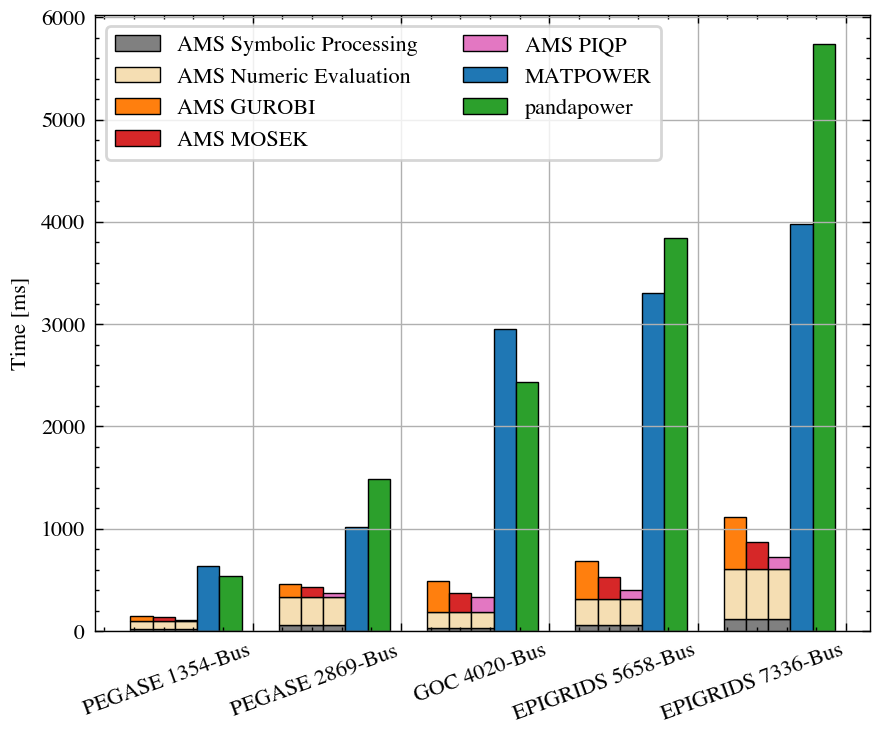

In [9]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])

# Disable LaTeX rendering to address the error:
# RuntimeError: LaTeX was not able to process the following string:
plt.rcParams['text.usetex'] = False

time_plot = time_df.iloc[7:]
case_names = dcopf_cases[7:]

figlc, axlc = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

x_index = np.arange(len(time_plot.index))
width = 0.15

edgecolor = 'black'
edgewidth = 0.5

axlc.bar(x_index - 2*width, time_plot['ams_parse'],
         color='grey', label='AMS Symbolic Processing',
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axlc.bar(x_index - 2*width, time_plot[num_cols].sum(axis=1),
         color='wheat', label='AMS Numeric Evaluation',
         bottom=time_plot['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axlc.bar(x_index - 2*width, time_plot['ams_grb'],
         color='tab:orange', label='AMS GUROBI',
         bottom=time_plot[num_cols + ['ams_parse']].sum(axis=1),
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)

axlc.bar(x_index - width, time_plot['ams_parse'],
         color='grey', label=None,
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axlc.bar(x_index - width, time_plot[num_cols].sum(axis=1),
         color='wheat', label=None,
         bottom=time_plot['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axlc.bar(x_index - width, time_plot['ams_mosek'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:red', label='AMS MOSEK',
         bottom=time_plot[num_cols + ['ams_parse']].sum(axis=1),
         width=width,)

axlc.bar(x_index, time_plot['ams_parse'],
         color='grey', label=None,
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axlc.bar(x_index, time_plot[num_cols].sum(axis=1),
         color='wheat', label=None,
         bottom=time_plot['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axlc.bar(x_index, time_plot['ams_piqp'],
         color='tab:pink', label='AMS PIQP',
         edgecolor=edgecolor, linewidth=edgewidth,
         bottom=time_plot[num_cols + ['ams_parse']].sum(axis=1),
         width=width,)

axlc.bar(x_index + width, time_plot['matpower'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:blue', label='MATPOWER',
         width=width,)

axlc.bar(x_index + 2*width, time_plot['pdp'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:green', label='pandapower',
         width=width,)

axlc.legend(loc='upper left', ncols=2, frameon=True)

_ = axlc.set_xticks(x_index + 3*width)
_ = axlc.set_xticklabels(case_names, rotation=20, ha='right')
_ = axlc.set_ylabel('Time [ms]')
axlc.grid()

figlc.savefig("fig_dcopf_time_large.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


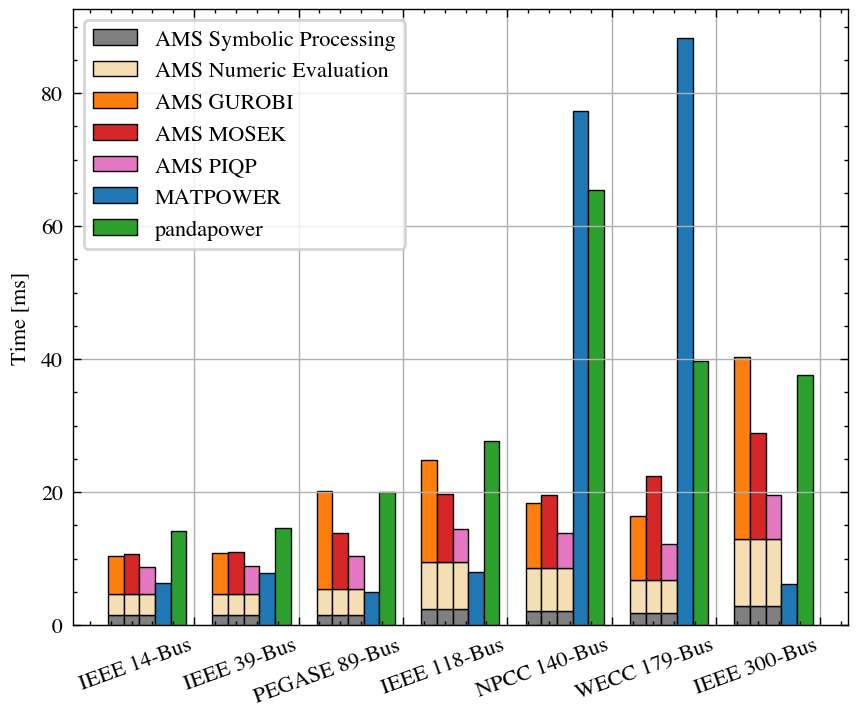

In [10]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

time_plot = time_df.iloc[0:7]
case_names = dcopf_cases[0:7]

figsc, axsc = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

x_index = np.arange(len(time_plot.index))
width = 0.15

edgecolor = 'black'
edgewidth = 0.5

axsc.bar(x_index - 2*width, time_plot['ams_parse'],
         color='grey', label='AMS Symbolic Processing',
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axsc.bar(x_index - 2*width, time_plot[num_cols].sum(axis=1),
         color='wheat', label='AMS Numeric Evaluation',
         bottom=time_plot['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axsc.bar(x_index - 2*width, time_plot['ams_grb'],
         color='tab:orange', label='AMS GUROBI',
         bottom=time_plot[num_cols + ['ams_parse']].sum(axis=1),
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)

axsc.bar(x_index - width, time_plot['ams_parse'],
         color='grey', label=None,
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axsc.bar(x_index - width, time_plot[num_cols].sum(axis=1),
         color='wheat', label=None,
         bottom=time_plot['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axsc.bar(x_index - width, time_plot['ams_mosek'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:red', label='AMS MOSEK',
         bottom=time_plot[num_cols + ['ams_parse']].sum(axis=1),
         width=width,)

axsc.bar(x_index, time_plot['ams_parse'],
         color='grey', label=None,
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axsc.bar(x_index, time_plot[num_cols].sum(axis=1),
         color='wheat', label=None,
         bottom=time_plot['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axsc.bar(x_index, time_plot['ams_piqp'],
         color='tab:pink', label='AMS PIQP',
         edgecolor=edgecolor, linewidth=edgewidth,
         bottom=time_plot[num_cols + ['ams_parse']].sum(axis=1),
         width=width,)

axsc.bar(x_index + width, time_plot['matpower'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:blue', label='MATPOWER',
         width=width,)

axsc.bar(x_index + 2*width, time_plot['pdp'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:green', label='pandapower',
         width=width,)

axsc.legend(loc='upper left', ncols=1,
            frameon=True)

_ = axsc.set_xticks(x_index + 3*width)
_ = axsc.set_xticklabels(case_names, rotation=20, ha='right')
_ = axsc.set_ylabel('Time [ms]')
axsc.grid()

figsc.savefig("fig_dcopf_time_small.eps", format='eps')

## Repeat OPF

In [11]:
time_rdcopf = pd.read_csv('results_time_repeat.csv', index_col=0)
obj_rdcopf = pd.read_csv('results_obj_repeat.csv', index_col=0)
mpr_res = pd.read_csv('results_matpower_repeat.csv')

In [12]:
timer_df = time_rdcopf.copy()
timer_df['matpower'] = mpr_res[mp_cols].min(axis=1).values

timer_df

,ams_mats,ams_parse,ams_eval,ams_final,ams_postinit,ams_grb,ams_mosek,ams_piqp,pdp,matpower
case5,0.56,1.60,2.12,0.00,0.1,48.25,52.80,35.75,343.68,615.6943
case14,0.62,1.59,2.57,0.00,0.1,54.47,56.35,38.97,326.99,149.0042
case39,0.71,1.57,2.33,0.00,0.1,73.38,71.41,44.62,321.74,92.5011
npcc,1.41,2.20,4.85,0.00,0.1,198.30,187.27,92.08,1299.37,3847.5184
wecc,1.56,1.87,3.44,0.01,0.1,186.24,153.03,95.09,935.63,2086.7494


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


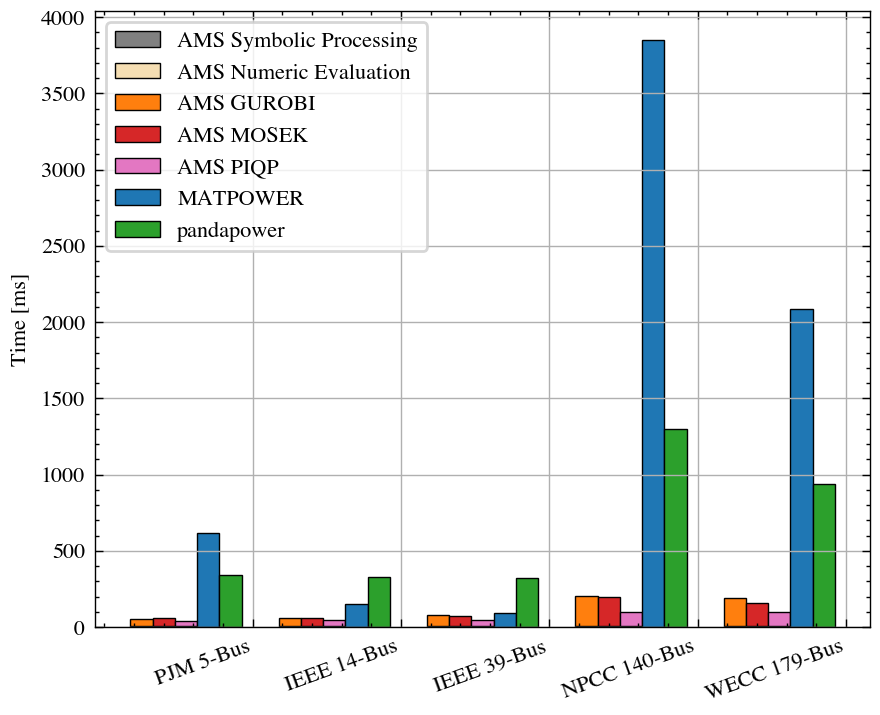

In [13]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

figro, axro = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

width = 0.15

x_index = np.arange(len(timer_df.index))

edgecolor = 'black'
edgewidth = 0.5

axro.bar(x_index-3*width, timer_df['ams_parse'],
         color='grey', label='AMS Symbolic Processing',
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axro.bar(x_index-3*width, timer_df[num_cols].sum(axis=1),
         color='wheat', label='AMS Numeric Evaluation',
         bottom=timer_df['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axro.bar(x_index-3*width, timer_df['ams_grb'],
         color='tab:orange', label='AMS GUROBI',
         bottom=timer_df[num_cols + ['ams_parse']].sum(axis=1),
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)

axro.bar(x_index-2*width, timer_df['ams_parse'],
         color='grey', label=None,
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axro.bar(x_index-2*width, timer_df[num_cols].sum(axis=1),
         color='wheat', label=None,
         bottom=timer_df['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axro.bar(x_index-2*width, timer_df['ams_mosek'],
         color='tab:red', label='AMS MOSEK',
         bottom=timer_df[num_cols + ['ams_parse']].sum(axis=1),
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)

axro.bar(x_index-width, timer_df['ams_parse'],
         color='grey', label=None,
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axro.bar(x_index-width, timer_df[num_cols].sum(axis=1),
         color='wheat', label=None,
         bottom=timer_df['ams_parse'],
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)
axro.bar(x_index-width, timer_df['ams_piqp'],
         color='tab:pink', label='AMS PIQP',
         bottom=timer_df[num_cols + ['ams_parse']].sum(axis=1),
         edgecolor=edgecolor, linewidth=edgewidth,
         width=width,)

axro.bar(x_index, timer_df['matpower'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:blue', label='MATPOWER',
         width=width,)
axro.bar(x_index + width, timer_df['pdp'],
         edgecolor=edgecolor, linewidth=edgewidth,
         color='tab:green', label='pandapower',
         width=width,)

_ = axro.set_xticks(x_index + 2*width)

ro_case_names = ['PJM 5-Bus', 'IEEE 14-Bus', 'IEEE 39-Bus', 'NPCC 140-Bus', 'WECC 179-Bus']
_ = axro.set_xticklabels(ro_case_names, rotation=20, ha='right')
_ = axro.set_ylabel('Time [ms]')
axro.grid()
_ = axro.legend(loc='upper left', ncols=1,
                frameon=True)

figro.savefig("fig_dcopf_repeat.eps", format='eps')

## EDUC

In [14]:
time_ed = pd.read_csv('results_ed.csv', index_col=0)
time_uc = pd.read_csv('results_uc.csv', index_col=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


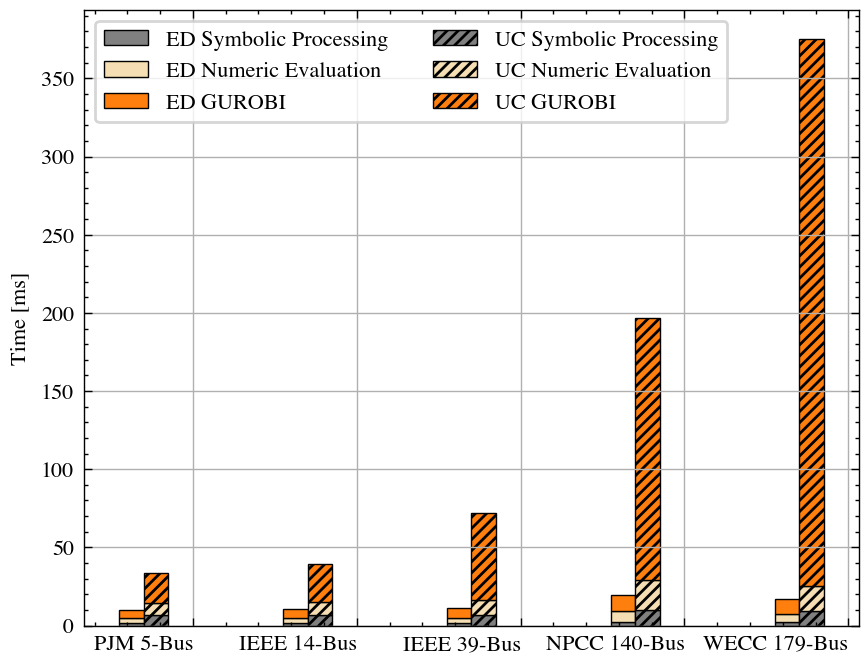

In [15]:
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

figeduc, axeduc = plt.subplots(1, 1, dpi=200, figsize=(5, 4))

time_ed_plot = time_ed
time_uc_plot = time_uc

width = 0.15
x_index = np.arange(len(time_ed_plot.index))

edgecolor = 'black'
edgewidth = 0.5

axeduc.bar(x_index-width, time_ed_plot['ams_parse'],
           color='grey', label='ED Symbolic Processing',
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)
axeduc.bar(x_index-width, time_ed_plot[num_cols].sum(axis=1),
           color='wheat', label='ED Numeric Evaluation',
           bottom=time_ed_plot['ams_parse'],
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)
axeduc.bar(x_index-width, time_ed_plot['ams_grb'],
           color='tab:orange', label='ED GUROBI',
           bottom=time_ed_plot[num_cols + ['ams_parse']].sum(axis=1),
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width,)

hatch = '//////'
axeduc.bar(x_index, time_uc_plot['ams_parse'],
           color='grey', label='UC Symbolic Processing',
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)
axeduc.bar(x_index, time_uc_plot[num_cols].sum(axis=1),
           color='wheat', label='UC Numeric Evaluation',
           bottom=time_uc_plot['ams_parse'],
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)
axeduc.bar(x_index, time_uc_plot['ams_grb'],
           color='tab:orange', label='UC GUROBI',
           bottom=time_uc_plot[num_cols + ['ams_parse']].sum(axis=1),
           edgecolor=edgecolor, linewidth=edgewidth,
           width=width, hatch=hatch)

_ = axeduc.set_xticks(x_index + 1.5*width)
educ_cases = ['PJM 5-Bus', 'IEEE 14-Bus',
              'IEEE 39-Bus', 'NPCC 140-Bus',
              'WECC 179-Bus',]

_ = axeduc.set_xticklabels(educ_cases, rotation=0, ha='right')
_ = axeduc.set_ylabel('Time [ms]')
axeduc.grid()

axeduc.legend(loc='upper left', ncols=2,
              frameon=True)

figeduc.savefig("fig_educ_time.eps", format='eps')

## EDUC at Large Scale

In [16]:
# this file is in unit 's' rather than 'ms'
time_educ = pd.read_csv('results_educ_large.csv', index_col=0)
time_educ.set_index('time', inplace=True)

time_educ

,UC,ED
time,,
ams_mats,0.2223,0.2238
ams_parse,14.8685,19.6837
ams_eval,39.3289,48.6910
ams_final,0.0001,0.0001
ams_postinit,0.0007,0.0001
ams_solver,45.2441,39.0214


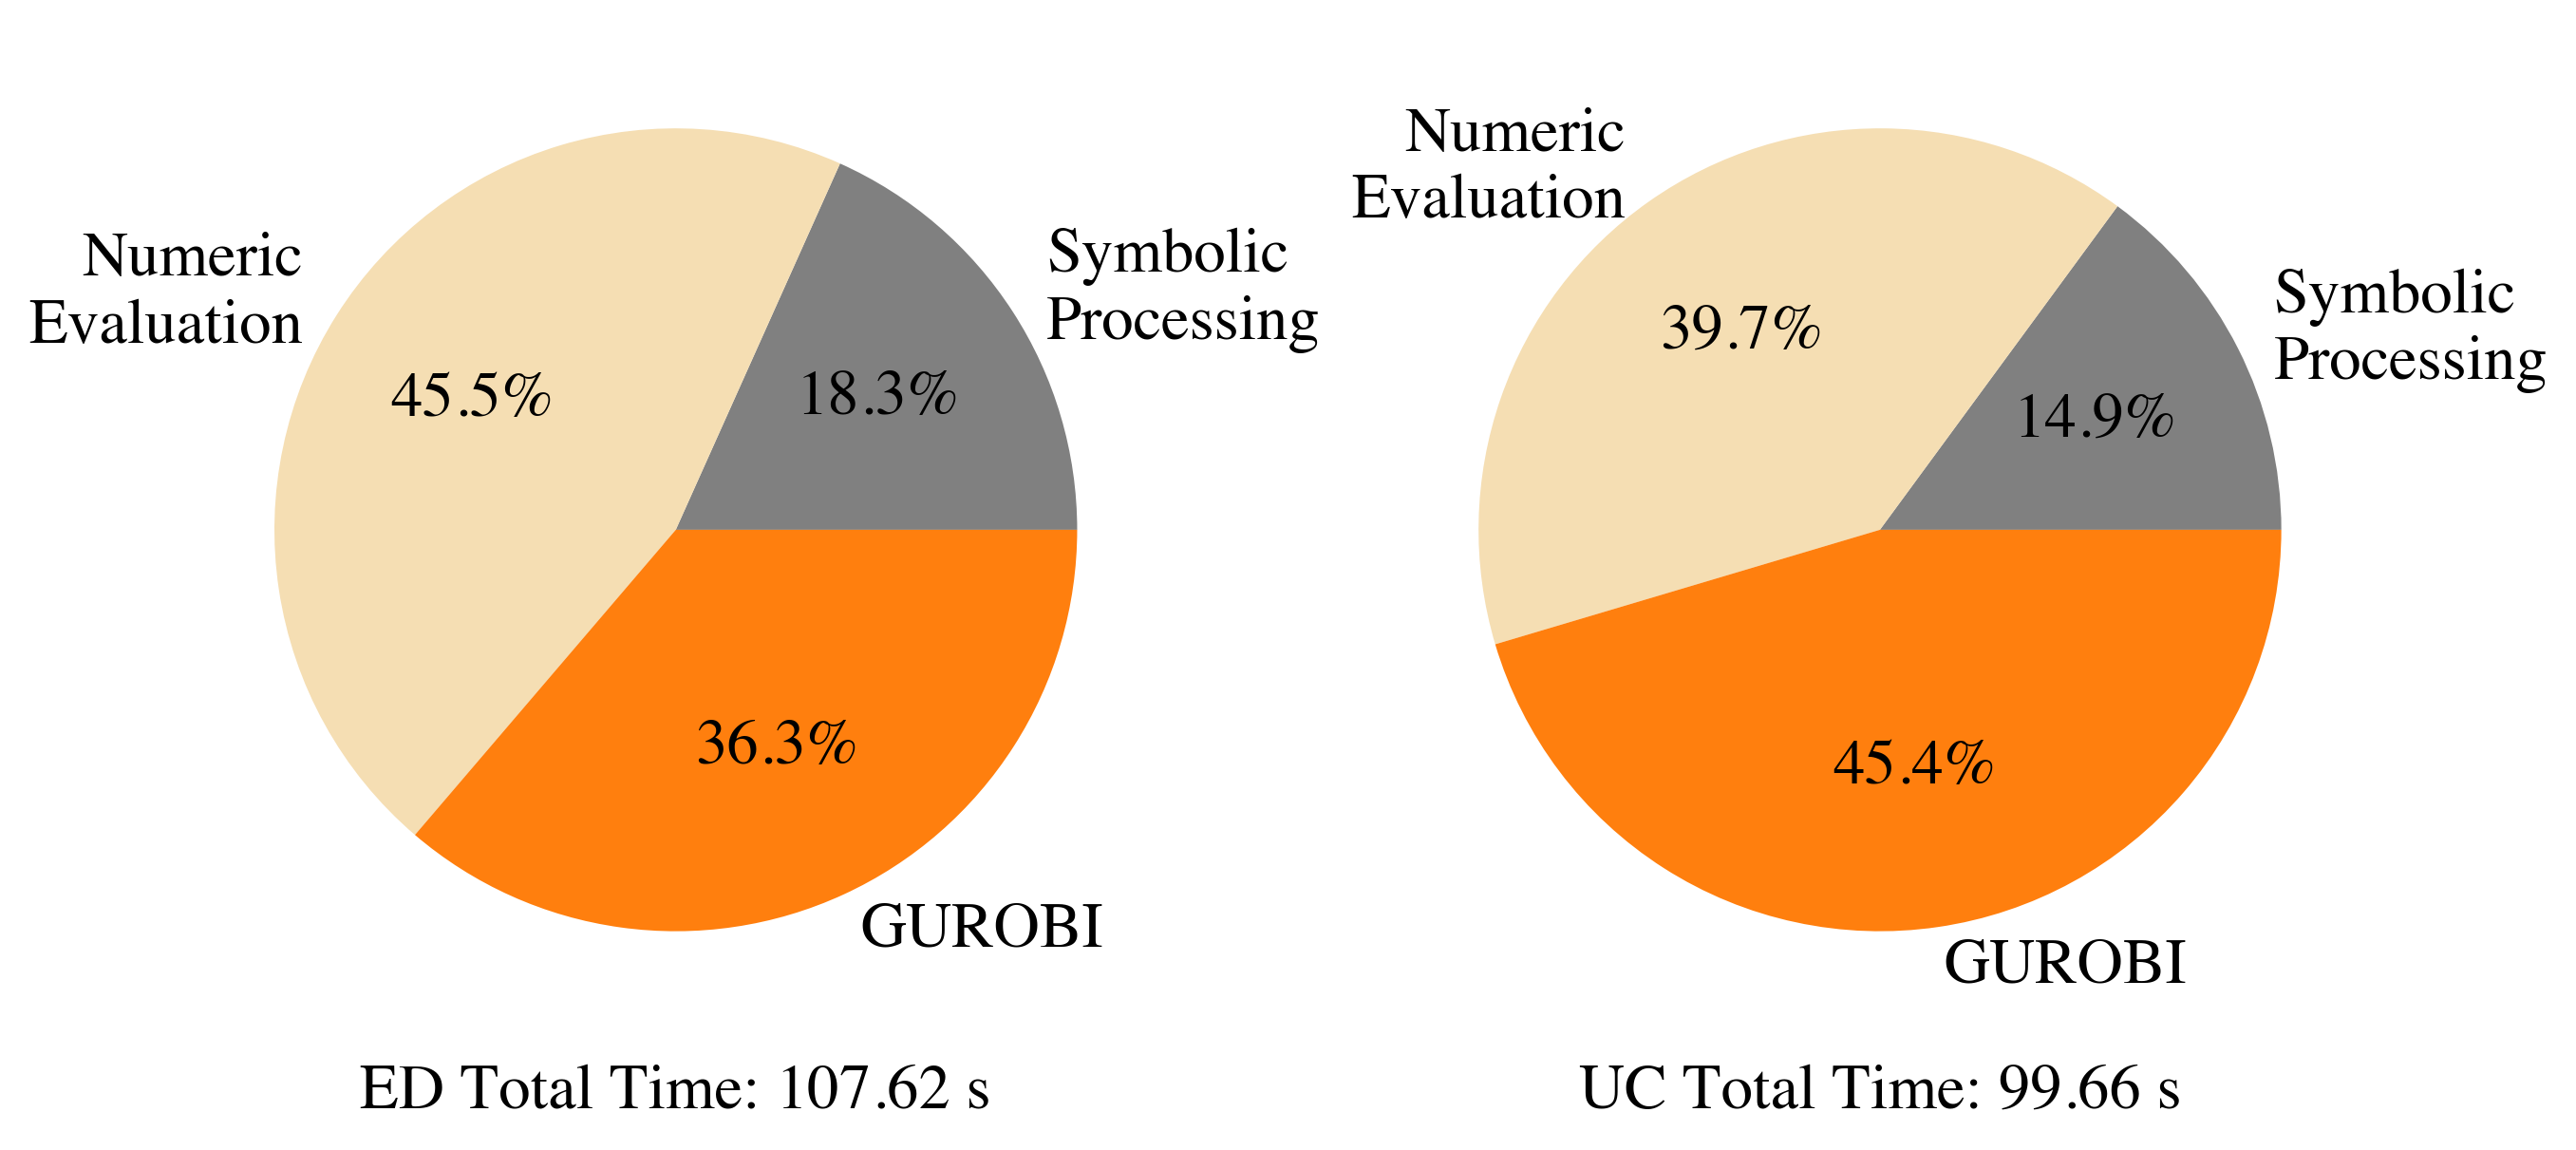

In [17]:
# Define the categories
categories = {
    'Symbolic\nProcessing': ['ams_parse'],
    'Numeric\nEvaluation': ['ams_mats', 'ams_eval', 'ams_final', 'ams_postinit'],
    'GUROBI': ['ams_solver']
}

# Function to aggregate data based on categories
def aggregate_data(df, categories, column):
    aggregated_data = {}
    for category, items in categories.items():
        aggregated_data[category] = df.loc[items, column].sum()
    return aggregated_data

# Aggregate data for ED and UC
ed_data = aggregate_data(time_educ, categories, 'ED')
uc_data = aggregate_data(time_educ, categories, 'UC')

# Create pie charts
plt.style.use('default')
plt.style.use(['science', 'ieee'])
plt.rcParams['text.usetex'] = False

figpi, axpi = plt.subplots(1, 2, figsize=(5, 3))

colors_pi = ['grey', 'wheat', 'tab:orange']

# ED Pie Chart
axpi[0].pie(ed_data.values(), labels=ed_data.keys(), autopct='%1.1f%%', colors=colors_pi)
axpi[0].set_xlabel(f'ED Total Time: {time_educ["ED"].sum():.2f} s')

# UC Pie Chart
axpi[1].pie(uc_data.values(), labels=uc_data.keys(), autopct='%1.1f%%', colors=colors_pi)
axpi[1].set_xlabel(f'UC Total Time: {time_educ["UC"].sum():.2f} s')

figpi.savefig("fig_educ_pie.eps", format='eps')